In [300]:
import pandas as pd

In [301]:
data=pd.read_csv("abalone_original.csv")

In [302]:
data

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [303]:
data['sex']=pd.get_dummies(data['sex'],drop_first=True)

In [304]:
data

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,0,91,73,19,102.8,44.9,20.2,30.0,15
1,0,70,53,18,45.1,19.9,9.7,14.0,7
2,0,106,84,27,135.4,51.3,28.3,42.0,9
3,0,88,73,25,103.2,43.1,22.8,31.0,10
4,1,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,0,113,90,33,177.4,74.0,47.8,49.8,11
4173,0,118,88,27,193.2,87.8,42.9,52.1,10
4174,0,120,95,41,235.2,105.1,57.5,61.6,9
4175,0,125,97,30,218.9,106.2,52.2,59.2,10


In [305]:
x=data.iloc[:,0:8]
y=data['rings']

In [306]:
x

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
0,0,91,73,19,102.8,44.9,20.2,30.0
1,0,70,53,18,45.1,19.9,9.7,14.0
2,0,106,84,27,135.4,51.3,28.3,42.0
3,0,88,73,25,103.2,43.1,22.8,31.0
4,1,66,51,16,41.0,17.9,7.9,11.0
...,...,...,...,...,...,...,...,...
4172,0,113,90,33,177.4,74.0,47.8,49.8
4173,0,118,88,27,193.2,87.8,42.9,52.1
4174,0,120,95,41,235.2,105.1,57.5,61.6
4175,0,125,97,30,218.9,106.2,52.2,59.2


In [307]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings, Length: 4177, dtype: int64

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [309]:
y_test

668     13
1580     8
3784    11
463      5
2615    12
        ..
575     11
3231    12
1084     7
290     17
2713     4
Name: rings, Length: 836, dtype: int64

In [310]:
y_train

3141     5
3521     3
883     15
3627    10
2106    14
        ..
1033    10
3264    12
1653    10
2607     9
2732     8
Name: rings, Length: 3341, dtype: int64

In [311]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Now we have to convert my data into tensors with Float data type

In [312]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

In [313]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [314]:
X_train[0]

tensor([ 1.4761, -2.8886, -2.7757, -1.4109, -1.6309, -1.5576, -1.5894, -1.6550])

In [315]:
y_train=torch.tensor(np.asarray(y_train))
y_test=torch.tensor(np.asarray(y_test))

In [316]:
y_train[0]

tensor(5)

In [317]:
y_test

tensor([13,  8, 11,  5, 12, 11,  7,  8,  7,  9,  8,  8, 11,  9,  4,  7,  7, 17,
         7,  7,  7,  5,  8,  9, 10, 10,  5, 15, 10, 14,  8,  4,  9, 13,  7,  7,
         8,  9,  8, 11, 15, 12, 17, 16, 11, 11,  8, 10, 11,  6, 13,  7, 13, 20,
        12,  7,  8, 10,  7,  7,  9,  9, 11,  8,  7, 12, 13, 17,  8, 12,  9, 17,
        10,  6, 11,  8,  8,  9,  8,  8,  8,  6,  7, 13, 11,  6,  9, 12,  5,  6,
        11, 11,  8,  7, 16,  8, 11,  8, 18, 11, 12, 14, 12, 11,  6,  9,  7,  6,
        11, 11, 11, 12, 20, 10, 14, 10, 10, 12,  4, 12,  7, 13,  6,  8, 17, 15,
         9, 11,  7, 11,  8,  7,  7, 10, 11,  9, 10,  9,  8, 16, 16, 13,  6,  9,
        10,  9,  8,  8,  8,  5,  8, 11,  5,  9,  9,  6,  8,  7, 10, 11, 12,  8,
         9, 10,  5, 16,  7,  6, 15,  9, 10,  3,  6, 10, 11, 12,  5,  8,  5, 13,
         9, 11,  7,  9, 15,  8, 10,  8,  5,  9, 19,  9,  8,  9, 11,  9,  9,  9,
         5, 15, 10, 14, 12,  8, 12, 11,  5, 10, 11, 23,  4, 11, 11, 10,  9,  9,
         9,  8,  5, 13, 12, 14,  8, 11, 

In [318]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(8,15)
        self.fc2 = torch.nn.Linear(15,11)
        self.output=torch.nn.Linear(11,1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x=F.relu(self.output(x))
        return x

In [319]:
Neural_Network=ANN()

In [320]:
loss_function=nn.L1Loss()
optimizer=torch.optim.Adam(Neural_Network.parameters(),lr=0.01)

In [321]:
list_of_loss=[]

In [322]:
for i in range(0,450):
    y_pred=Neural_Network.forward(X_train)
    loss=loss_function(y_pred,y_train)
    list_of_loss.append(loss)
    print("Epoch number {} loss {}".format(i,loss.item()))
    optimizer.zero_grad()  ## Initially our derivative will be 0
    loss.backward()        ## Do the first propagation
    optimizer.step()        ## Performs a single optimization step

c:\users\harsh\anaconda3\envs\pytorch2\lib\site-packages\torch\nn\modules\loss.py:94: UserWarning: Using a target size (torch.Size([3341])) that is different to the input size (torch.Size([3341, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch number 0 loss 9.647315979003906
Epoch number 1 loss 9.548131942749023
Epoch number 2 loss 9.444482803344727
Epoch number 3 loss 9.331290245056152
Epoch number 4 loss 9.206449508666992
Epoch number 5 loss 9.067841529846191
Epoch number 6 loss 8.912153244018555
Epoch number 7 loss 8.736790657043457
Epoch number 8 loss 8.541031837463379
Epoch number 9 loss 8.322858810424805
Epoch number 10 loss 8.079782485961914
Epoch number 11 loss 7.809179306030273
Epoch number 12 loss 7.510280609130859
Epoch number 13 loss 7.186143398284912
Epoch number 14 loss 6.841794490814209
Epoch number 15 loss 6.488669395446777
Epoch number 16 loss 6.14420223236084
Epoch number 17 loss 5.827782154083252
Epoch number 18 loss 5.555319786071777
Epoch number 19 loss 5.335203170776367
Epoch number 20 loss 5.164815425872803
Epoch number 21 loss 5.0337700843811035
Epoch number 22 loss 4.929916858673096
Epoch number 23 loss 4.844832897186279
Epoch number 24 loss 4.77339506149292
Epoch number 25 loss 4.7123789787292

Epoch number 207 loss 2.3395862579345703
Epoch number 208 loss 2.339564561843872
Epoch number 209 loss 2.339543581008911
Epoch number 210 loss 2.3395228385925293
Epoch number 211 loss 2.3395028114318848
Epoch number 212 loss 2.339482069015503
Epoch number 213 loss 2.339461326599121
Epoch number 214 loss 2.3394412994384766
Epoch number 215 loss 2.339423656463623
Epoch number 216 loss 2.3394064903259277
Epoch number 217 loss 2.339388847351074
Epoch number 218 loss 2.3393712043762207
Epoch number 219 loss 2.339353322982788
Epoch number 220 loss 2.3393349647521973
Epoch number 221 loss 2.3393168449401855
Epoch number 222 loss 2.3392984867095947
Epoch number 223 loss 2.339280366897583
Epoch number 224 loss 2.339263916015625
Epoch number 225 loss 2.339247941970825
Epoch number 226 loss 2.339231491088867
Epoch number 227 loss 2.33921480178833
Epoch number 228 loss 2.339197874069214
Epoch number 229 loss 2.3391809463500977
Epoch number 230 loss 2.3391640186309814
Epoch number 231 loss 2.339148

Epoch number 411 loss 2.3376991748809814
Epoch number 412 loss 2.3376948833465576
Epoch number 413 loss 2.337691307067871
Epoch number 414 loss 2.3376874923706055
Epoch number 415 loss 2.3376834392547607
Epoch number 416 loss 2.337679624557495
Epoch number 417 loss 2.3376760482788086
Epoch number 418 loss 2.337672233581543
Epoch number 419 loss 2.3376688957214355
Epoch number 420 loss 2.337665319442749
Epoch number 421 loss 2.3376612663269043
Epoch number 422 loss 2.3376576900482178
Epoch number 423 loss 2.3376548290252686
Epoch number 424 loss 2.3376500606536865
Epoch number 425 loss 2.337646722793579
Epoch number 426 loss 2.3376433849334717
Epoch number 427 loss 2.337639331817627
Epoch number 428 loss 2.3376362323760986
Epoch number 429 loss 2.337631940841675
Epoch number 430 loss 2.337628126144409
Epoch number 431 loss 2.3376245498657227
Epoch number 432 loss 2.337620973587036
Epoch number 433 loss 2.3376171588897705
Epoch number 434 loss 2.337614059448242
Epoch number 435 loss 2.33

In [323]:
import matplotlib.pyplot as plt

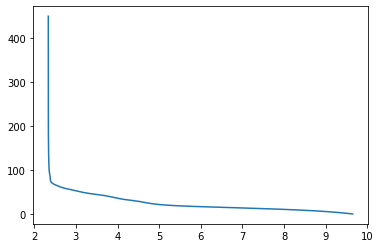

In [324]:
plt.plot(list_of_loss,range(0,450))

In [325]:
# torch.no_grad() tells PyTorch that we do not want to perform back-propagation,

In [326]:
torch.save(Neural_Network,"first_model.pt")

In [327]:
torch.load("first_model.pt")

ANN(
  (fc1): Linear(in_features=8, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=11, bias=True)
  (output): Linear(in_features=11, out_features=1, bias=True)
)

In [328]:
test=torch.tensor([1.4761, -2.8886, -2.7757, -1.4109, -1.6309, -1.5576, -1.5894, -1.6550])

In [329]:
test

tensor([ 1.4761, -2.8886, -2.7757, -1.4109, -1.6309, -1.5576, -1.5894, -1.6550])

In [332]:
with torch.no_grad():
    print(Neural_Network(test))

tensor([9.8750])
